The Support vector machine algorithm (SVM) aims to categorize points, of different nature, located in a given space.
The SVM achieves that by finding a frontier that separates groups of points by the category they represent.


For the binomial case (Two possible categories), in a 2-dimensional space (two components), the points represent two independent variables, and a line exemplifies the frontier (Figure 1).

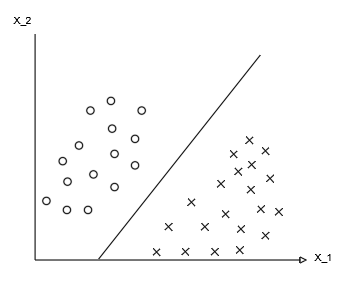
Figure 1

For example, we could set environmental pressure and temperature as independent variables and the state rain or no rain as independent variables. If we have found an optimum 2D frontier, the model would probably tell us that having high environmental pressure and low-temperature could cause rain. Another part of the space would contain the position of the points that do not cause rain.

Since this example is oversimplified and very likely non-real, we could use more independent variables to find a better representation.


In the same way that we use a line in a 2D space, we can use a point to separate a 1D space (Figure 2), a plane in a 3D space, and a hyperplane in a higher-dimensional space.

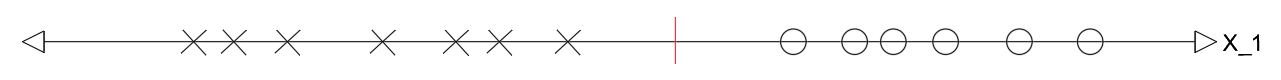
Figure 2

https://youtu.be/efR1C6CvhmE

Coming back to the 2D example, we can say that there is an infinite number of lines that can separate two categories of points (Figure 3). 
The line that is further apart from the closest point of the two classes is the one that generalizes the better. 

Therefore, the line that the algorithm chooses must accomplish two things, separate the set of points as correct as possible, and create the widest margin.
The margin is defined as the distance between the model and the closest point to it.

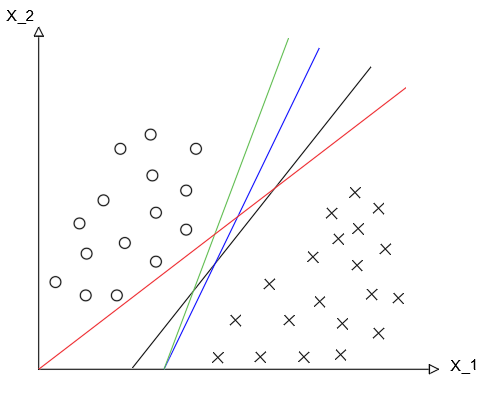
Figure 3

## SVM hard margin

A plane in a 2D space can be defined by $\omega_1 x_1 + \omega_2 x_2 + b= 0$, where each ith $\omega$ component is multiplied by the $x$ component with the same index. Therefore, the same equation can be written as $\omega^T x + b = 0$, which maintain the same form for higher dimensions.

Now we define the same scenario for general dimension. We can define a function that transform a vector from a space with dimension $D$ to the real numbers: $R^D \rightarrow{} R$; $x \rightarrow f(x)$. Mapping a hyperplane (a line in 2D). would give us $$f(x) = \omega^T x + b = 0   \; \; (1)$$

We want to find a hyperplane, for which we get $f(x_k) = \omega^T x_k + b \geq 0$ when the example $x_k$ falls on the positive side of the hyperplane and $f(x_k) = \omega^T x_k + b < 0$ on the negative side.

If we define $x_k$ as a point and $\omega$ as a vector, we can find that $\omega$ is perpendicular to the hyperplane over the function $f(x)$. 

Remembering the condition 1 ($f(x) = 0$), we can choose two points $x_a, x_b$ living inside the plane. Therefore,
$$f(x_a) - f(x_b) = (\omega^T x_a + b) - (\omega^T x_b + b)$$
$$= \omega^T x_a - \omega^T x_b -b + b$$
by the linearity of the dot product, and using (1)
$$= \omega^T(x_a - x_b) = 0$$
from here we can see that the dot product of $\omega$ and the vector created by $x_a - x_b$ is equal to zero, which means they are linearly independent, or orthogonal to each other.

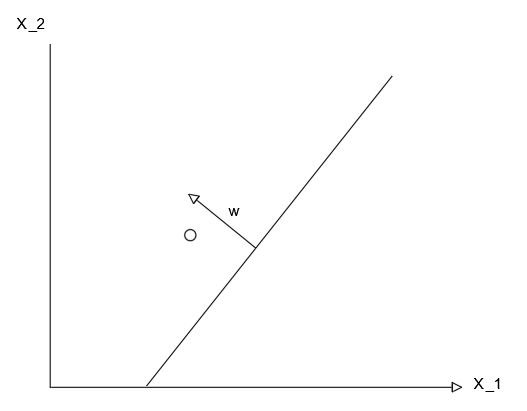
Figure 4

We have found that the vector $\omega$ is perpendicular to the plane, and therefore, we can define the distance to any point as.

$$d_H(x_k) =  \frac{|\omega^Tx_k + b|}{||\omega||_2} $$

We are trying to find a hyperplane that maximizes the margin, and therefore, we must find the closest positive and negative example.

$$ \min_k d_H(x_k) = \frac{|\omega^T x_k + b|}{||\omega||_2}$$

And then, find the longest distance between these points. The parameters that manipulate the position of the hyperplane are $\omega$ and $b$, thus

$$ \max_{w, b} \left \{ \min_k d_H(x_k) = \frac{|\omega^T x_k + b|}{||\omega||_2} \right \} \;\;\;\;\;(2)$$

Remembering that we want to find a function that classifies as positive, when the label $y_k$ is equal to 1 and negative, when the label is equal to -1,		

$$f(x_k) = \omega^T x_k + b \geq 0 \;\;\;\; y_k = 1$$ 
$$f(x_k) = \omega^T x_k + b < 0 \;\;\;\; y_k = -1$$

We can compress the two previous equations, in the form
$$y_k[\omega^Tx_k + b] \geq 0 \;\;\;\; (3)
$$

where the previous inequality is satisfied when the example is correctly classified.

Since (3) should be positive defined for all examples, the following equality stands, $y_k[\omega^Tx_k + b] = |\omega^T x_k + b|$, and we can substitute (3) in (2).

$$ \max_{w, b} \left \{ \min_k \frac{y_k[\omega^Tx_k + b] }{||\omega||_2} \right \} $$

Taking $||\omega||_2$ out of the equation since it does not depend on $k$

$$ \max_{w, b} \frac{1}{||\omega||_2} \left \{ \min_k y_k[\omega^Tx_k + b] \right \}  \;\;\;\;\; (3)$$

We know that the closes example to the hyperplane is at a distance $r$, therefore, we can manipulate (3) as two different entities, maximizing $\frac{1}{||\omega||_2}$, given the constraint $\min_k y_k[\omega^Tx_k + b] = r$.

$$\max_{\omega, b} \frac{1}{||\omega||_2}$$

$$\text{S. t.   } \min_{k} y_k[\omega^T x_k + b] = r \;\;\;\;\; (4)$$

Stating that the rest of points are at a distance greater than $r$. 

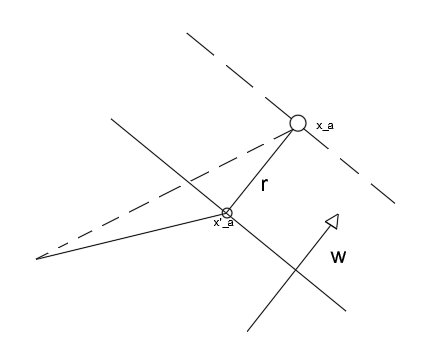
Figure 5

If we want to normalize the distance from the closes point, so that it becomes 1 instead of $r$, we can first define the following transformation.
$$ \omega = r\omega' \text{ and } b = rb'$$

$$y_k[(r\omega)^T x_k + rb] = r$$

And divide both sides by $r$

$$ y_k[(\omega)^T x_k + b] = 1 $$

The given constraint is then given by 

$$ \min_{k} y_k[(\omega)^T x_k + b] = 1$$

Which tell the algorithm to find certain $\omega$ and $b$ so that the distance of $x_{closest}$ is equal to 1, which is the same as saying that all values have to be equal or grater than 1.

$$\min_{k} y_k[(\omega)^T x_k + b] = 1 \longrightarrow y_k[(\omega)^T x_k + b] \geq 1$$

And therefore, we obtain from (4)

$$\max_{\omega, b} \frac{1}{||\omega||_2}$$

$$\text{S. t.  } y_k[\omega^T x_k + b] \geq 1$$

Instead of maximizing the function $\frac{1}{||\omega||_2}$, it is usual the minimize the square of the reciprocal and multiply it by a constant $\frac{1}{2}$ to get a cleaner solution when the gradient is computed.

$$\min_{\omega, b} \frac{1}{2} ||\omega||_2^2$$

$$\text{S. t.  } y_k[\omega^T x_k + b] \geq 1 \;\;\;\;\; (5)$$

The previous equation can be solved using Lagrange multipliers, or convex optimization packages. The result of this two, would return a vector $omega$ and $b$, which will define a hyperplane that would predict positive values as positive, and negative values as negative.

but real life datasets very rarely are separable, and thus the hard margin cannot solve this kind of problems.

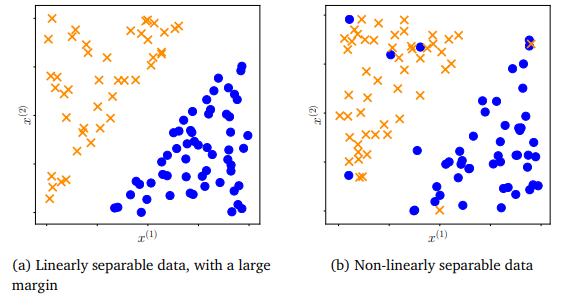
Figure 6

## Apendix

### Vectors

The classic representation of a geometrical vector in a 2D space is given by $y = xm + b$. Where m represents the slope of the line and b the intercept. Also $-y + xm + b = 0 \longleftrightarrow{} -f(x) + xm + b = 0$. A more general representation can be given by the $a_1 \hat{i} + a_2 \hat{j} + b= 0$, where $\hat{i}$ and $\hat{j}$ are the unitary vectors. In an euclidean space, the same vector can be represented as $a_1 \hat{e_1} + a_2 \hat{e_2} + b = 0$. If we decompose $a_i = q_i \cdot \lambda$, where $a_i$ represents a constant multiplied by any real value, we can rewrite the same vector as. $(q_1 \cdot \lambda) \hat{e_1} + (q_2 \cdot \lambda) \hat{e_2} + b = 0$. That means that the same value of $\lambda$ is assigned to each of the components of the given point; therefore, having just one free variable.

Using the last notation, we can define a point in a 2D space as $$4\hat{e_1} + 2\hat{e_2} + 5 = 0$$ 
Where $a_1 = 2 \cdot 2$,  $a_2 = 1 \cdot 2$ and $b = 5$. 

Another point inside the same vector, can be defined as $3\hat{e_1} + 2\hat{e_2} + 5 = 0$, which can, at the same time, span the whole vector/subspace/affine subspace, due to the vector $\leftrightarrow{}$ point duality.

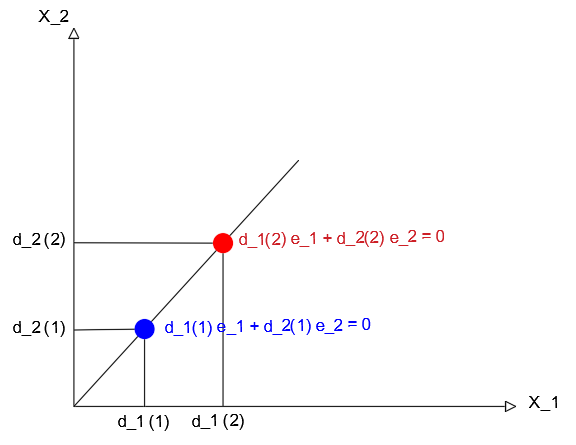
Figure 4

### Plane

A plane inside a 3D space can be defined as $Ax + By + Cz = D \leftrightarrow{} Ax + By + Cz - D = 0$  in generalized notation, it can be represented as $a_1 \hat{e_1} + a_2 \hat{e_2} + a_3 \hat{e_3} = a_4$

In the same way, each component can be decompose into constants and incremental variables. For this case, we would need two free variable as follows $a_i = (p_i \cdot \lambda + q_i \cdot \mu)$

### distance from a plane

####  1st derivation

Given a euclidean space (where the components of the basis are orthonormal), we can find a distance between a point and a plane by finding the component of the resulting vector* perpendicular to the plane.

In this case, we will define any point in the plane, to define a vector $\vec{a}$ created by the point $a$.
Then, we will construct a vector $\vec{b}$ perpendicular to the plane (Figure 5), which will guarantee the minimum distance. It can be proven that a normal vector can be constructed with the value of the components of the plane (e.g $4x + 3y + 3 = 0  \rightarrow{} \vec{v} = 4\hat{i} + 3\hat{j}$)

The dot product returns a combination of the components of the two vectors. Since we are only interested on the length of the vector $\vec{a}$, we will dot the vector $\vec{a}$ with the unitary vector $\frac{\vec{b}}{||b||}$, Since we are just looking for the positive values the dot product (distance), we would get,

$$dist(a, P_0) = \frac{|a \cdot b|}{||b||_2}$$

<font size="2">* Remembering the point-vector duality, we can define the given point as a vector. </font> 

https://www.youtube.com/watch?v=SgJo7_4mp6w

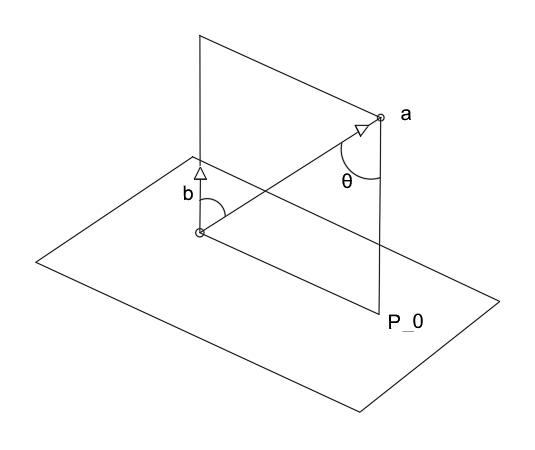
Figure 5

#### 2nd derivation

From Figure 5 we can see that the distance of the point $a$ to the plane is given by $distance(a, P_o) = ||b||\cos{\theta}$. 

We haven't define a value for the angle between the two vectors, but we know that the dot product between two vectors $a$ and $b$ is defined as $a \cdot b = ||a||||b||\cos{\theta}$. Solving for $||b||\cos{\theta}$ we get, $||b||\cos{\theta} = \frac{a \cdot b}{||b||}$.

Since the dot product returns positive and negative values, depending of the value of the angle between the two vectors, we calculate the absolute value of the previous product. For this case, we will used the norm 2* to compute the vectors length.

$$ dist(a, P_0) = \frac{|a \cdot b|}{||b||_2}$$

<font size="1">* A vector $\vec{v}$ norm 2 is defined as $\sqrt{\sum_{i=1}^N v_i}$. </font> 

If our plane is defined as $Ax + By + Cz + d = 0$ and the point has coordinates from the origin $(x_l, y_l, z_l)$ 
$$ dist(a, P_o) =  \frac{|Ax_l + By_l + Cz_l - (Ax_0 + By_0 + Cx_0)|}{\sqrt{A + B + C}}$$

then the distance can be defined as:

$$ dist(a, P_o) =  \frac{|Ax_l + By_l + Cz_l + d|}{\sqrt{A + B + C}} $$

<font size="1">* Notice that the intercept was added due to the relative position of the vector $\vec{a}$ from the plane. </font> 

https://youtu.be/zWMTTRJ0l4w

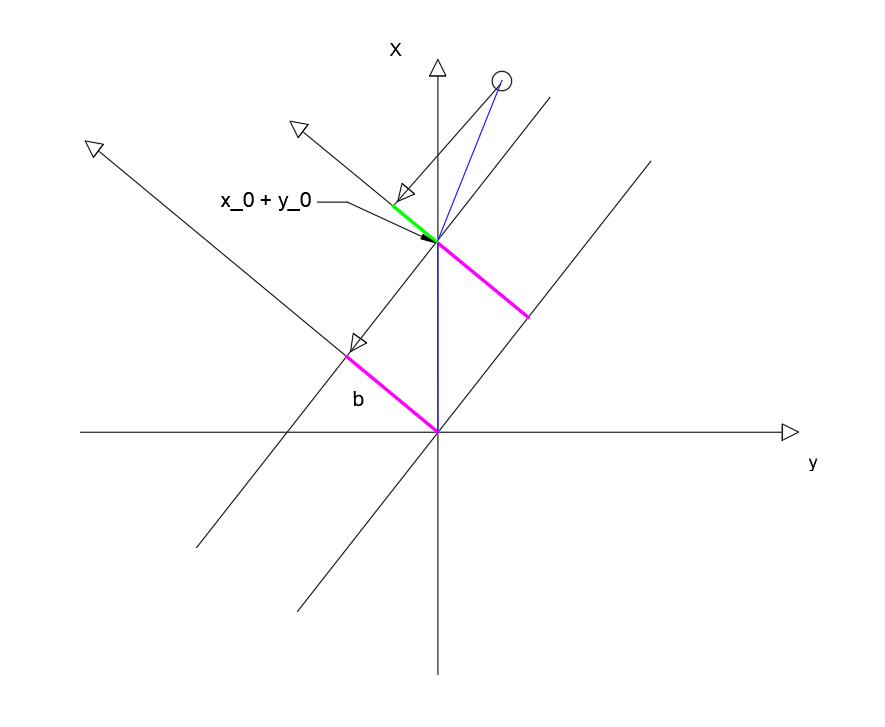

### Constrained problems

#### Indicator Function

We can solve a constrained problem of the form 
$$ \max f(x) $$

$$ \text{S. t.  } g(x) \geq 0$$

Transforming it into an unconstrained problem through an indicator function.

$\mathcal{J}(x) = f(x) + \sum_{i = 1}^N \mathbf{1} g(x) $

where 


$$ \mathbf{1}(\mathcal{z})=  \left\{
\begin{array}{ll}
      0 & \mathcal(z) \leq 0 \\
      \infty & \mathcal(z) > 0\\
\end{array} 
\right. $$ 


Which gives infinity penalty when the constriction is not satisfied. In most cases this method is not easy to calculate.
Instead  the Lagrange multipliers is used to solve this kind of problems.


#### Lagrange Multiplier

The Lagrange multipliers states that there is certain point of a constraint g(x) and a function f(x) where the tangent passing through both functions, will be the same, and therefore their gradients would be equivalent, which can be represented as 

$$ \nabla f(x) = \lambda \nabla g(x)$$

$$ \nabla f(x) - \nabla g(x) = 0$$

$$ \nabla[f(x) - g(x)] = 0$$

We can define an auxiliary function

$$\mathcal{L}(x, \lambda) = f(x) - \lambda g(x)$$

For multiple constraints

$$\mathcal{L}(x, \lambda) = f(x) - \sum_{i = 1}^{N}\lambda_i g(x) = f(x) - \lambda^T g(x)$$

From which we get the gradient over $x$ and $\lambda$ of $\mathcal{L}$ and equalize to zero, to find the local (as the function is constrained) maximums and minimums.

The Lagrange multipliers can solve for equality constraints ($h(x) = c$) as well as inequalities ($g(x) \leq 0$).

Lagrange multipliers
- https://en.wikipedia.org/wiki/Lagrange_multiplier#:~:text=In%20mathematical%20optimization%2C%20the%20method,chosen%20values%20of%20the%20variables).

https://www.youtube.com/watch?v=8mjcnxGMwFo

Karush–Kuhn–Tucker conditions
- https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions

#### Duality 

The duality problem is introduced to simplify the computation of some sets. 

It passes to solve m equations for m number of primal variables ($x$) to solve for n number of equations that accounts for the number of constraints in the problem ($\lambda$). 


In the case of the SVM it helps to introduce kernels into the problem, which can only be introduced when the Lagrange doe not depend on primal variables.

$$
\begin{equation}
\max_{\lambda} \mathcal{D}(\lambda)\\
\text{S. t.  } \lambda \leq 0
\end{equation}
$$

Since the problem passes from maximizing over a variable to minimizing over another variable, is important to consider the $minmax$ inequality 

$$
\begin{equation}
\max _{\boldsymbol{y}} \min _{\boldsymbol{x}} \varphi(\boldsymbol{x}, \boldsymbol{y}) \leqslant \min _{\boldsymbol{x}} \max _{\boldsymbol{y}} \varphi(\boldsymbol{x}, \boldsymbol{y})
\end{equation}
$$
Which does not apply to SVM, since the function and the constraints are all convex, therefore this product commutes.

The dual problem is constructed by solving the primal Lagrange over the primal variables, and getting the first order conditions ($\nabla \mathcal{L}(x) = 0$).

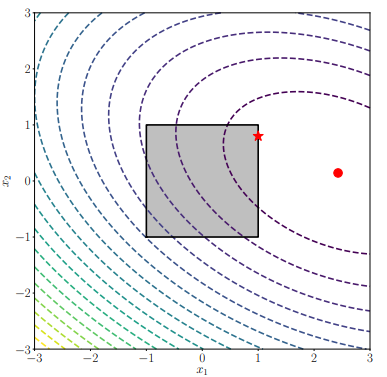

Convex optimization
- https://youtu.be/oLowhs83aHk

Convex function
- https://youtu.be/nOFXLCCvtm0